In [1]:
import graphlab as gl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from distutils.version import StrictVersion
assert (StrictVersion(gl.version) >= StrictVersion('1.8.5')), 'Updated GraphLab'

This non-commercial license of GraphLab Create for academic use is assigned to pukaracharya2052@gmail.com and will expire on July 25, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1510338879.log


In [2]:
wiki = gl.SFrame('people_wiki.gl/')
wiki.head()

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [3]:
wiki_docs = gl.text_analytics.count_words(wiki['text'])
wiki_docs = wiki_docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)

In [4]:
topic_model = gl.topic_model.create(wiki_docs, num_topics=10, num_iterations=200)

Learning a topic model

Number of documents     59071

Vocabulary size    547462

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 7.10s         | 1.24218e+07    | 0               |

| 20        | 13.53s        | 1.29969e+07    | 0               |

| 30        | 22.28s        | 7.40125e+06    | 0               |

| 40        | 28.62s        | 1.23676e+07    | 0               |

| 50        | 37.00s        | 1.23799e+07    | 0               |

| 60        | 45.26s        | 5.46123e+06    | 0               |

| 70        | 52.06s        | 1.25421e+07    | 0               |

| 80        | 58.38s        | 1.27739e+07    | 0               |

| 90        | 1m 7s         | 1.27273e+07    | 0               |

| 100       | 1m 13s        | 1.20559e+07    | 0               |

| 110       | 1m 22s        | 1.25073e+07    | 0               |

| 120       | 1m 31s        | 1.33474e+07    | 0               |

| 130       | 1m 37s        | 1.28534e+07    | 0               |

| 140       | 1m 46s        | 1.14172e+07    | 0               |

| 150       | 1m 54s        | 1.28996e+07    | 0               |

| 160       | 2m 0s         | 1.23685e+07    | 0               |

| 170       | 2m 9s         | 1.2774e+07     | 0               |

| 180       | 2m 18s        | 5.7177e+06     | 0               |

| 190       | 2m 24s        | 1.15198e+07    | 0               |

| 200       | 2m 33s        | 1.26838e+07    | 0               |

+-----------+---------------+----------------+-----------------+

In [5]:
topic_model

Class                          : TopicModel

Schema
------
Vocabulary Size                : 547462

Settings
--------
Number of Topics               : 10
alpha                          : 5.0
beta                           : 0.1
Iterations                     : 200
Training time                  : 154.0662
Verbose                        : False

Accessible fields             : 
m['topics']                   : An SFrame containing the topics.
m['vocabulary']               : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.

In [8]:
topic_model = gl.load_model('topic_models/lda_assignment_topic_model')

In [9]:
topic_model.get_topics([0], num_words=3)

topic,word,score
0,university,0.0337723780773
0,research,0.0120334992502
0,professor,0.0118011432268


In [10]:
sum(topic_model.get_topics([2], num_words=50)['score'])

0.21034366078939654

In [11]:
[x['words'] for x in topic_model.get_topics(output_type='topic_words', num_words=10)]

[['university',
  'research',
  'professor',
  'international',
  'institute',
  'science',
  'society',
  'studies',
  'director',
  'national'],
 ['played',
  'season',
  'league',
  'team',
  'career',
  'football',
  'games',
  'player',
  'coach',
  'game'],
 ['film',
  'music',
  'album',
  'released',
  'band',
  'television',
  'series',
  'show',
  'award',
  'appeared'],
 ['university',
  'school',
  'served',
  'college',
  'state',
  'american',
  'states',
  'united',
  'born',
  'law'],
 ['member',
  'party',
  'election',
  'minister',
  'government',
  'elected',
  'served',
  'president',
  'general',
  'committee'],
 ['work',
  'art',
  'book',
  'published',
  'york',
  'magazine',
  'radio',
  'books',
  'award',
  'arts'],
 ['company',
  'business',
  'years',
  'group',
  'time',
  'family',
  'people',
  'india',
  'million',
  'indian'],
 ['world',
  'won',
  'born',
  'time',
  'year',
  'team',
  'championship',
  'tour',
  'championships',
  'title'],
 ['born

In [12]:
themes = ['science and research','team sports','music, TV, and film','American college and politics','general politics', \
         'art and publishing','Business','international athletics','Great Britain and Australia','international music']

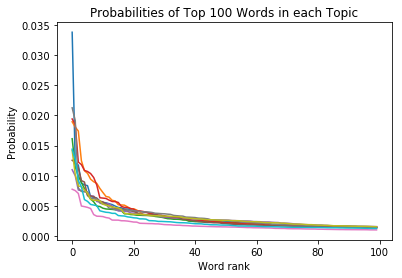

In [13]:
for i in range(10):
    plt.plot(range(100), topic_model.get_topics(topic_ids=[i], num_words=100)['score'])
plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')

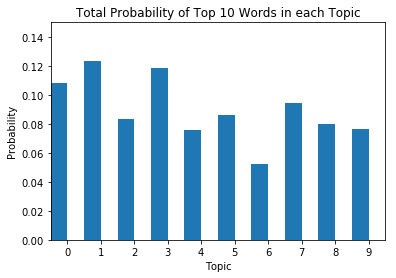

In [14]:
top_probs = [sum(topic_model.get_topics(topic_ids=[i], num_words=10)['score']) for i in range(10)]

ind = np.arange(10)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind-(width/2),top_probs,width)
ax.set_xticks(ind)

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
plt.xlim(-0.5,9.5)
plt.ylim(0,0.15)
plt.show()

In [15]:
obama = gl.SArray([wiki_docs[int(np.where(wiki['name']=='Barack Obama')[0])]])
pred1 = topic_model.predict(obama, output_type='probability')
pred2 = topic_model.predict(obama, output_type='probability')
print(gl.SFrame({'topics':themes, 'predictions (first draw)':pred1[0], 'predictions (second draw)':pred2[0]}))

+--------------------------+---------------------------+
| predictions (first draw) | predictions (second draw) |
+--------------------------+---------------------------+
|     0.0295698924731      |      0.0403225806452      |
|     0.0403225806452      |      0.0537634408602      |
|     0.0188172043011      |      0.0241935483871      |
|      0.139784946237      |      0.0994623655914      |
|      0.612903225806      |       0.594086021505      |
|     0.0188172043011      |      0.0161290322581      |
|     0.0483870967742      |      0.0887096774194      |
|     0.0376344086022      |      0.0403225806452      |
|     0.0241935483871      |      0.0215053763441      |
|     0.0295698924731      |      0.0215053763441      |
+--------------------------+---------------------------+
+-------------------------------+
|             topics            |
+-------------------------------+
|      science and research     |
|          team sports          |
|      music, TV, and film      

In [16]:
def average_predictions(model, test_document, num_trials=100):
    avg_preds = np.zeros((model.num_topics))
    for i in range(num_trials):
        avg_preds += model.predict(test_document, output_type='probability')[0]
    avg_preds = avg_preds/num_trials
    result = gl.SFrame({'topics':themes, 'average predictions':avg_preds})
    result = result.sort('average predictions', ascending=False)
    return result

In [17]:
print average_predictions(topic_model, obama, 100)

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|    0.594892473118   |        general politics       |
|    0.137069892473   | American college and politics |
|    0.050752688172   |            Business           |
|   0.0489784946237   |          team sports          |
|   0.0406720430108   |      science and research     |
|   0.0346774193548   |    international athletics    |
|   0.0255376344086   |  Great Britain and Australia  |
|   0.0233602150538   |      international music      |
|   0.0230376344086   |       art and publishing      |
|   0.0210215053763   |      music, TV, and film      |
+---------------------+-------------------------------+
[10 rows x 2 columns]



In [18]:
george_bush = gl.SArray([wiki_docs[int(np.where(wiki['name']=='George W. Bush')[0])]])
print average_predictions(topic_model, george_bush, 100)

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|    0.426578947368   |        general politics       |
|    0.191081871345   | American college and politics |
|    0.102397660819   |            Business           |
|   0.0599122807018   |      science and research     |
|   0.0480116959064   |       art and publishing      |
|   0.0451754385965   |          team sports          |
|   0.0386842105263   |  Great Britain and Australia  |
|   0.0367543859649   |    international athletics    |
|   0.0297368421053   |      music, TV, and film      |
|   0.0216666666667   |      international music      |
+---------------------+-------------------------------+
[10 rows x 2 columns]



In [19]:
steven_gerrard = gl.SArray([wiki_docs[int(np.where(wiki['name']=='Steven Gerrard')[0])]])
print average_predictions(topic_model, steven_gerrard, 100)

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|       0.48556       |          team sports          |
|       0.17672       |  Great Britain and Australia  |
|       0.13016       |    international athletics    |
|       0.03688       |      international music      |
|       0.03112       |        general politics       |
|       0.03096       |      music, TV, and film      |
|        0.0296       |            Business           |
|        0.0276       |       art and publishing      |
|       0.02656       | American college and politics |
|       0.02484       |      science and research     |
+---------------------+-------------------------------+
[10 rows x 2 columns]



In [20]:
wiki['lda'] = topic_model.predict(wiki_docs, output_type='probability')

In [21]:
wiki['word_count'] = gl.text_analytics.count_words(wiki['text'])
wiki['tf_idf'] = gl.text_analytics.tf_idf(wiki['word_count'])

model_tf_idf = gl.nearest_neighbors.create(wiki, label='name', features=['tf_idf'], method='brute_force', distance='cosine')
model_lda_rep = gl.nearest_neighbors.create(wiki, label='name', features=['lda'], method='brute_force', distance='cosine')

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

In [22]:
model_tf_idf.query(wiki[wiki['name'] == 'Paul Krugman'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 24.105ms     |

| Done         |         | 100         | 298.35ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Paul Krugman,Paul Krugman,0.0,1
Paul Krugman,Elise Brezis,0.744498017262,2
Paul Krugman,Maitreesh Ghatak,0.81564984831,3
Paul Krugman,Kai A. Konrad,0.823700564406,4
Paul Krugman,David Colander,0.834625927759,5
Paul Krugman,Richard Blundell,0.837934267874,6
Paul Krugman,Gordon Rausser,0.83941534706,7
Paul Krugman,Edward J. Nell,0.842178500015,8
Paul Krugman,Robin Boadway,0.842374260596,9
Paul Krugman,Tim Besley,0.843088109253,10


In [23]:
model_lda_rep.query(wiki[wiki['name'] == 'Paul Krugman'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 5.49ms       |

| Done         |         | 100         | 28.702ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Paul Krugman,Paul Krugman,-2.22044604925e-16,1
Paul Krugman,John Antonakis,0.00561238975913,2
Paul Krugman,Tom Perls,0.00589578318394,3
Paul Krugman,James Kasting,0.00709242492843,4
Paul Krugman,Parag Khanna,0.0078292699977,5
Paul Krugman,Mary Hawkesworth,0.00803187449383,6
Paul Krugman,Ronald Giere,0.00804993761781,7
Paul Krugman,Nassim Nicholas Taleb,0.00946015398892,8
Paul Krugman,Peter Doran,0.00950090326025,9
Paul Krugman,Marty Makary,0.00951138214585,10


In [24]:
alex_rodriguez_tfidf = list(model_tf_idf.query(wiki[wiki['name'] == 'Alex Rodriguez'], label='name', k=5000)['reference_label'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 32.061ms     |

| Done         |         | 100         | 726.968ms    |

+--------------+---------+-------------+--------------+

In [25]:
print 'value of k:', alex_rodriguez_tfidf.index('Mariano Rivera')

value of k: 52


In [26]:
alex_rodriguez_lda = list(model_lda_rep.query(wiki[wiki['name'] == 'Alex Rodriguez'], label='name', k=5000)['reference_label'])
print 'value of k:', alex_rodriguez_lda.index('Mariano Rivera')

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 4.857ms      |

| Done         |         | 100         | 37.505ms     |

+--------------+---------+-------------+--------------+

value of k: 458


In [27]:
topic_model['alpha']

5.0

In [28]:
topic_model['beta']

0.1

In [29]:
tpm_low_alpha = gl.load_model('topic_models/lda_low_alpha')
tpm_high_alpha = gl.load_model('topic_models/lda_high_alpha')

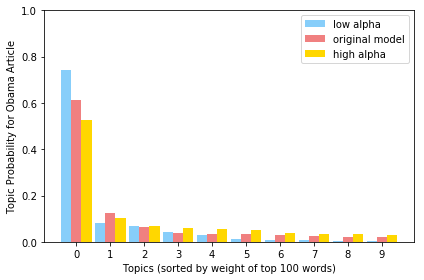

In [30]:
a = np.sort(tpm_low_alpha.predict(obama,output_type='probability')[0])[::-1]
b = np.sort(topic_model.predict(obama,output_type='probability')[0])[::-1]
c = np.sort(tpm_high_alpha.predict(obama,output_type='probability')[0])[::-1]
ind = np.arange(len(a))
width = 0.3

def param_bar_plot(a,b,c,ind,width,ylim,param,xlab,ylab):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    b1 = ax.bar(ind, a, width, color='lightskyblue')
    b2 = ax.bar(ind+width, b, width, color='lightcoral')
    b3 = ax.bar(ind+(2*width), c, width, color='gold')

    ax.set_xticks(ind+width)
    ax.set_xticklabels(range(10))
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_ylim(0,ylim)
    ax.legend(handles = [b1,b2,b3],labels=['low '+param,'original model','high '+param])

    plt.tight_layout()
    
param_bar_plot(a,b,c,ind,width,ylim=1.0,param='alpha',
               xlab='Topics (sorted by weight of top 100 words)',ylab='Topic Probability for Obama Article')

In [31]:
paul_krugman = gl.SArray([wiki_docs[int(np.where(wiki['name']=='Paul Krugman')[0])]])
paul_krugman_low_alpha = average_predictions(tpm_low_alpha, paul_krugman, 100)
print paul_krugman_low_alpha[(paul_krugman_low_alpha['average predictions'] > 0.3) |
                             (paul_krugman_low_alpha['average predictions'] < 0.05)
                            ]
print len(paul_krugman_low_alpha[(paul_krugman_low_alpha['average predictions'] > 0.3) |
                             (paul_krugman_low_alpha['average predictions'] < 0.05)
                            ])

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|    0.632901234568   |       art and publishing      |
|   0.0167901234568   |    international athletics    |
|   0.0167283950617   |  Great Britain and Australia  |
|    0.014012345679   | American college and politics |
|   0.0138271604938   |      science and research     |
|   0.0127777777778   |          team sports          |
|   0.0126543209877   |        general politics       |
|   0.0104320987654   |            Business           |
+---------------------+-------------------------------+
[? rows x 2 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.
8


In [32]:
paul_krugman_high_alpha = average_predictions(tpm_high_alpha, paul_krugman, 100)
print paul_krugman_low_alpha[(paul_krugman_high_alpha['average predictions'] > 0.3) |
                             (paul_krugman_high_alpha['average predictions'] < 0.05)
                            ]
print len(paul_krugman_low_alpha[(paul_krugman_high_alpha['average predictions'] > 0.3) |
                             (paul_krugman_high_alpha['average predictions'] < 0.05)
                            ])

+---------------------+--------------------+
| average predictions |       topics       |
+---------------------+--------------------+
|    0.632901234568   | art and publishing |
|   0.0104320987654   |      Business      |
+---------------------+--------------------+
[? rows x 2 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.
2


In [33]:
del tpm_low_alpha
del tpm_high_alpha
tpm_low_gamma = gl.load_model('topic_models/lda_low_gamma')
tpm_high_gamma = gl.load_model('topic_models/lda_high_gamma')

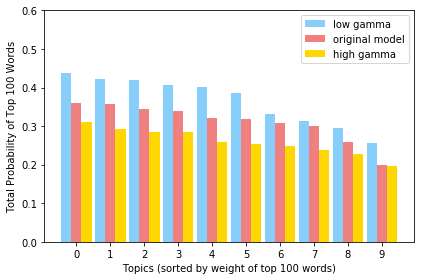

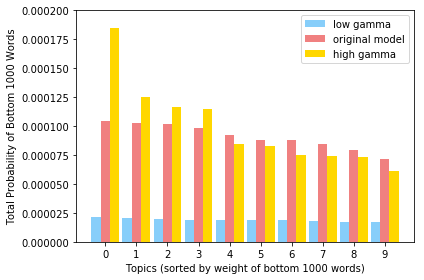

In [34]:
a_top = np.sort([sum(tpm_low_gamma.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]
b_top = np.sort([sum(topic_model.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]
c_top = np.sort([sum(tpm_high_gamma.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]

a_bot = np.sort([sum(tpm_low_gamma.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]
b_bot = np.sort([sum(topic_model.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]
c_bot = np.sort([sum(tpm_high_gamma.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]

ind = np.arange(len(a))
width = 0.3
    
param_bar_plot(a_top, b_top, c_top, ind, width, ylim=0.6, param='gamma',
               xlab='Topics (sorted by weight of top 100 words)', 
               ylab='Total Probability of Top 100 Words')

param_bar_plot(a_bot, b_bot, c_bot, ind, width, ylim=0.0002, param='gamma',
               xlab='Topics (sorted by weight of bottom 1000 words)',
               ylab='Total Probability of Bottom 1000 Words')

In [35]:
def calculate_avg_words(model, num_words=547462, cdf_cutoff=0.5, num_topics=10):
    avg_num_of_words = []
    for i in range(num_topics):
        avg_num_of_words.append(len(model.get_topics(topic_ids=[i], num_words=547462, cdf_cutoff=.5)))
    avg_num_of_words = np.mean(avg_num_of_words)
    return avg_num_of_words

In [36]:
calculate_avg_words(tpm_low_gamma)

252.40000000000001

In [37]:
calculate_avg_words(tpm_high_gamma)

576.20000000000005